MARKET SEGMENT ANALYSIS ON MCDONALDS' DATA

STEP 1: Deciding (not) to Segment
McDonald's can choose to serve the entire market without segmenting or recognize the value of understanding consumer differences to implement a differentiated marketing strategy that better meets diverse needs.

STEP 2: Specifying the Ideal Target Segment
McDonald's management should focus on identifying attractive market segments that are homogeneous, distinct, and reachable, prioritizing those with a positive perception of the brand and frequent dining behavior, while also considering segments that currently view McDonald's unfavorably.

STEP 3: The dataset includes responses from 1,453 Australian consumers regarding their perceptions of McDonald’s across various attributes such as YUMMY, CONVENIENT, and HEALTHY, using YES/NO responses. Along with these attributes, demographic data including AGE and GENDER were collected, though a real market segmentation study would ideally include additional information on dining behavior and information channel usage for a more comprehensive understanding of each segment.

Location: C:\Users\Jyoshita\OneDrive\Desktop\Fynn\mcdonalds.csv



In [3]:
#STEP 4: Exploring data
import pandas as pd
# Load the CSV file
mcdonalds = pd.read_csv(r'C:\Users\Jyoshita\OneDrive\Desktop\Fynn\mcdonalds.csv')
# Display column names
print(mcdonalds.columns)
print('--------------------------------------')
# Display the shape of the dataset
print(mcdonalds.shape)
print('--------------------------------------')
# Display the first three rows
print(mcdonalds.head(3))
print('---------------------------------------')

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
--------------------------------------
(1453, 15)
--------------------------------------
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
---------------------------------------


In [5]:
# Convert the first 11 columns to a binary matrix (Yes -> 1, No -> 0)
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)
print(MD_x.head(3))
# Compute and display column means rounded to 2 decimal places
col_means = MD_x.mean().round(2)
print(col_means)

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
#Principle Component Analysis
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
MD_pca=pca.fit_transform(MD_x)
MD_p=pca.fit(MD_x)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


Explained variance ratio: [0.25556637 0.14834762]


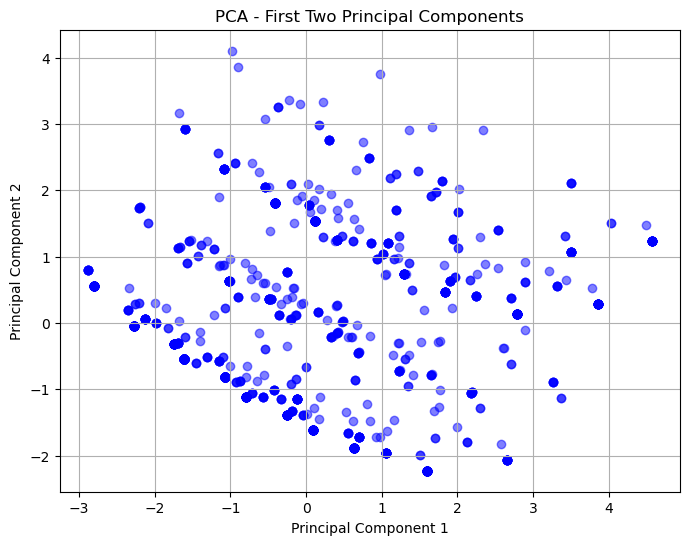

In [7]:
# Plot for PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is your DataFrame
# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)  # Standardize the data

# Step 2: Apply PCA
pca = PCA(n_components=2)  # You can change the number of components
MD_pca = pca.fit_transform(MD_x_scaled)  # Apply PCA transformation

# Step 3: Explained Variance Ratio (How much variance each principal component explains)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Step 4: Visualizing the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='blue', alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [8]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


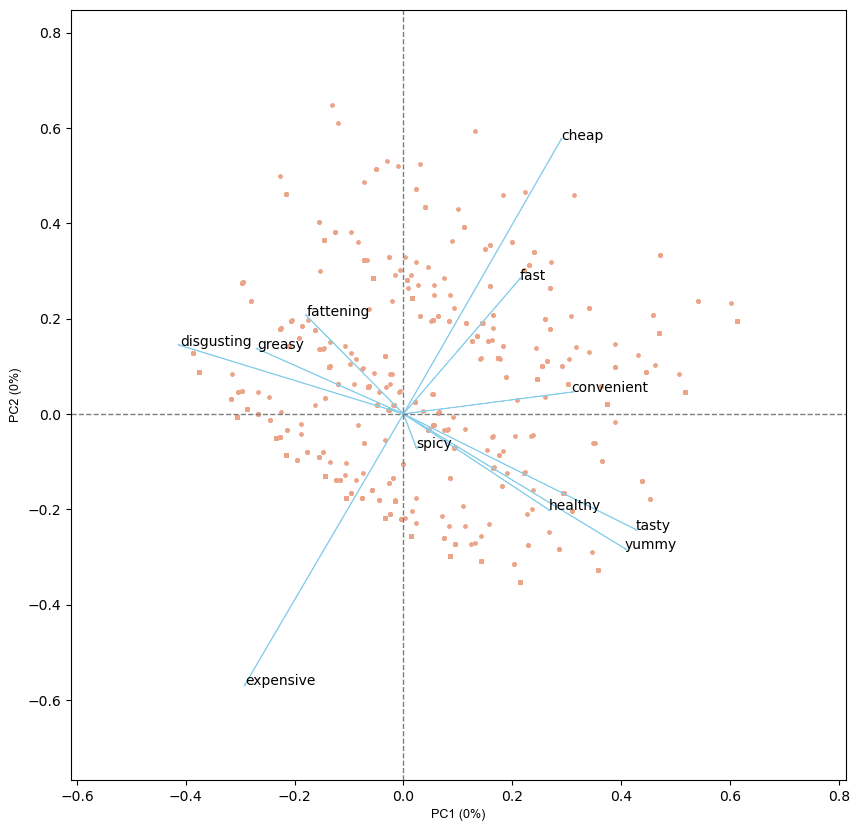

In [9]:
#Biplot
from bioinfokit.visuz import cluster
load = (pca.components_)
cluster.biplot(cscore=MD_pca, loadings=-load, labels=MD_x.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

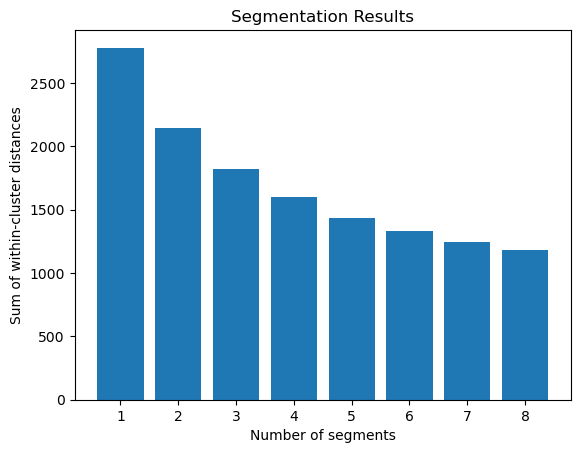

In [24]:
# Histogram
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


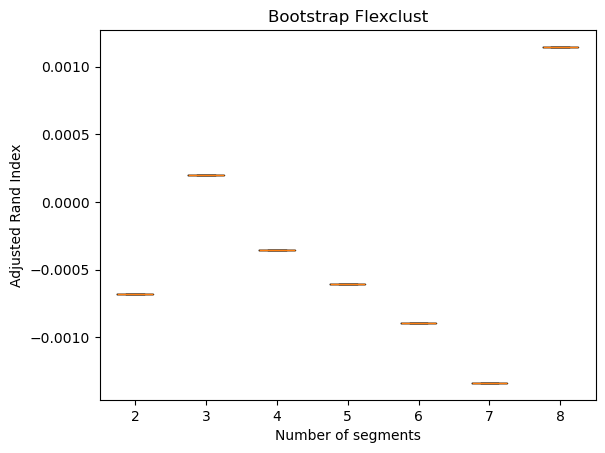

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


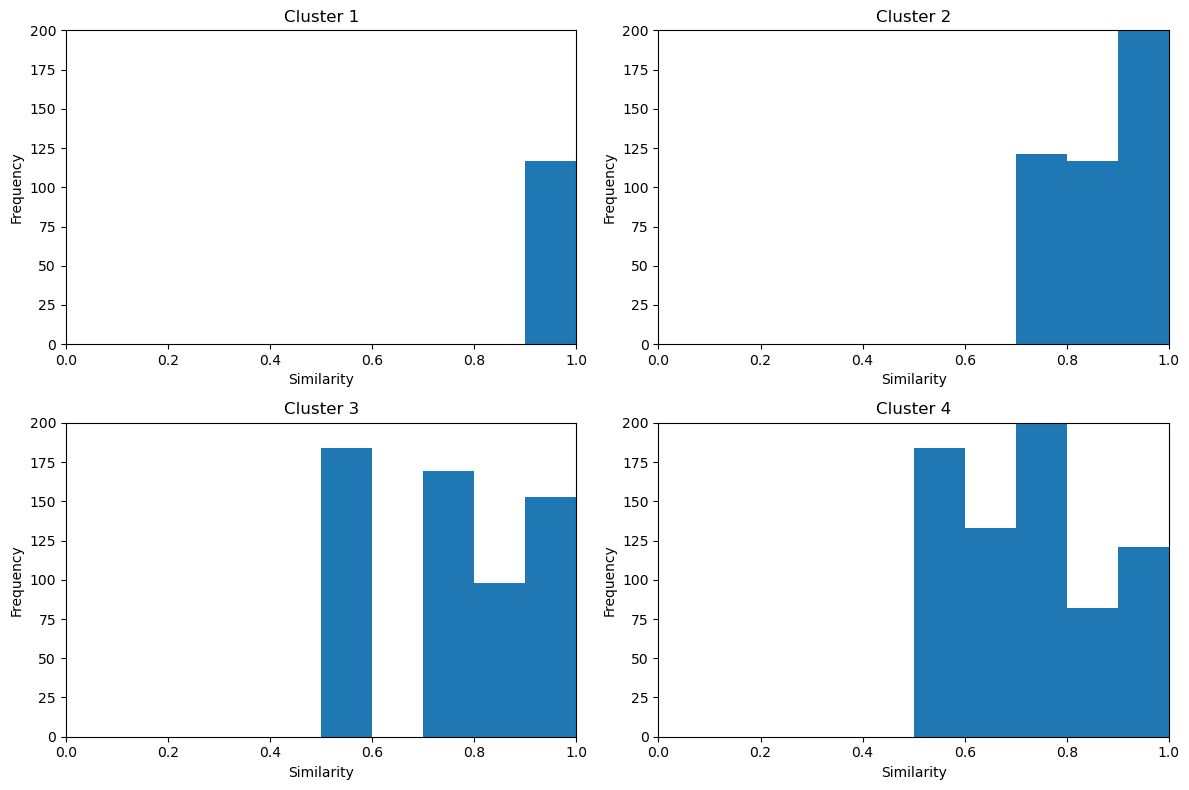

In [28]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loop through clusters 1 to 4
for i in range(1, 5):
    # Use string keys when referencing MD_km
    labels = MD_km[str(i)].predict(MD_x)
    similarities = MD_km[str(i)].transform(MD_x).min(axis=1)
    
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot histogram for each cluster
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Cluster {i}')

    # Set x and y limits and ticks
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


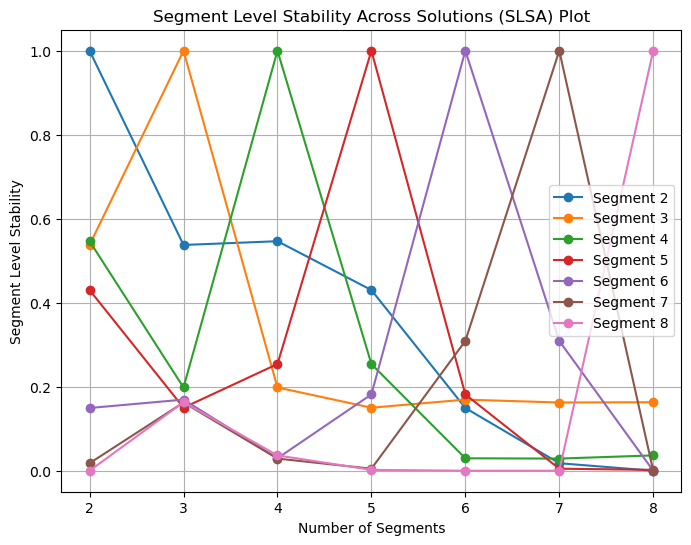

In [31]:

num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()


In [34]:
print(MD_km)

{'1': KMeans(n_clusters=1, n_init=10, random_state=1234), '2': KMeans(n_clusters=2, n_init=10, random_state=1234), '3': KMeans(n_clusters=3, n_init=10, random_state=1234), '4': KMeans(n_clusters=4, n_init=10, random_state=1234), '5': KMeans(n_clusters=5, n_init=10, random_state=1234), '6': KMeans(n_clusters=6, n_init=10, random_state=1234), '7': KMeans(n_clusters=7, n_init=10, random_state=1234), '8': KMeans(n_init=10, random_state=1234)}


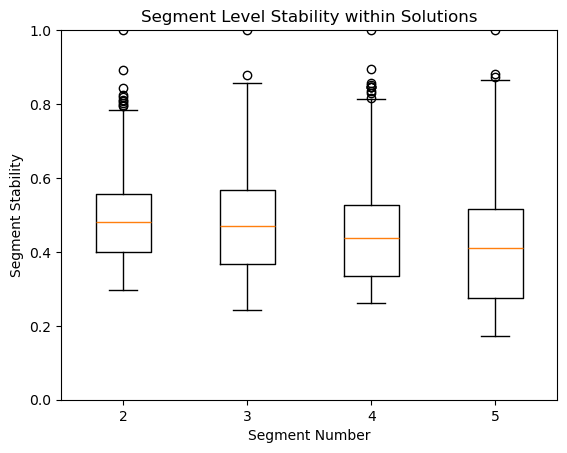

In [36]:

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km[segment].predict(MD_x)
    segment_similarities[segment] = MD_km[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

# Assuming MD_x is your dataset
# Here, we create a dummy dataset for demonstration
MD_x = np.random.rand(500, 10)  # Example dataset with 500 samples and 10 features

# Perform KMeans clustering (equivalent to clusters(MD.k4) in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit a Gaussian Mixture Model (GMM) as an alternative to flexmix
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Create a confusion matrix-like table to compare KMeans and GMM clustering results
confusion_matrix = pd.crosstab(kmeans_labels, gmm_labels, rownames=['kmeans'], colnames=['mixture'])
print(confusion_matrix)

# Calculate log-likelihood for both models (equivalent to logLik(MD.m4a) and logLik(MD.m4) in R)
kmeans_log_likelihood = kmeans.score(MD_x)  # This returns the negative log-likelihood
gmm_log_likelihood = gmm.score(MD_x)

print(f"KMeans Log-Likelihood: {kmeans_log_likelihood}")
print(f"GMM Log-Likelihood: {gmm_log_likelihood}")


C:\Users\Jyoshita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0   1   2   3
kmeans                 
0        10  32  12  63
1        56  48  13   7
2        92  11  38   9
3         0  14  79  16
KMeans Log-Likelihood: -342.41589669154723
GMM Log-Likelihood: -1.3951683223380291


In [46]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: -1.3408355948485675
Log-likelihood for MD.m4: -1.319943657839136


In [50]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)


like_n_counts = mcdonalds['Like.n'].value_counts()


print(like_n_counts)


Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [52]:
from patsy import dmatrices

independent_vars = mcdonalds.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [55]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


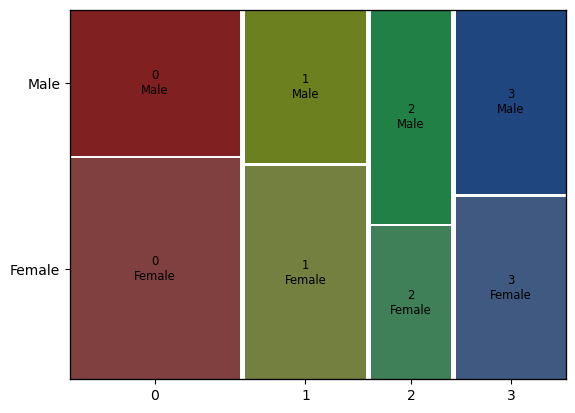

In [65]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

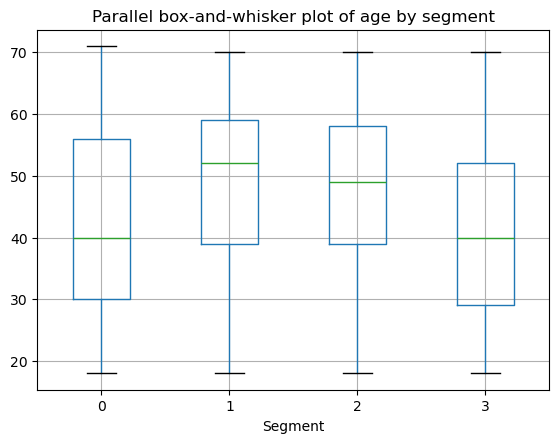

In [67]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()


In [68]:
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.540123
1,1,2.584483
2,2,2.822368
3,3,2.665306


In [70]:
#Like
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.808642
1,1,3.794828
2,2,5.430921
3,3,6.738776


In [72]:
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.521605
1,1,0.398276
2,2,0.411184
3,3,0.571429


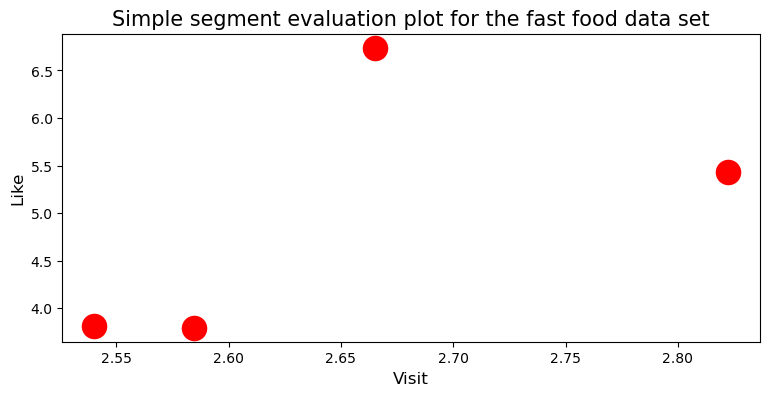

In [73]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()